In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터셋 URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# 컬럼명 정의 (데이터셋에 헤더가 없음)
columns = [
 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'sex',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
# na_values 파라미터를 사용하여 '?'를 결측값으로 처리하며 데이터 로드
df = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)
# 데이터의 첫 5행 확인
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
# 데이터프레임의 종합 정보 확인
print("--- 데이터 정보 ---")
df.info()
# 수치형 데이터의 기술 통계량 확인
print("\n--- 수치형 데이터 기술 통계량 ---")
print(df.describe())
# 결측값 확인
print("\n--- 컬럼별 결측값 개수 ---")
print(df.isnull().sum())

--- 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

--- 수치형 데이터 기술 통계량 ---
                age        fnlwgt  education-num  capi

####education컬럼 대신에 education-num을 사용하는 것이 좋다

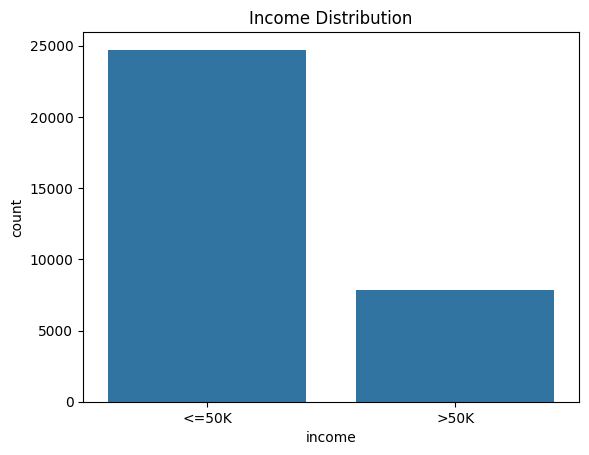

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [ ]:
# income 변수 분포 확인
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()
# 비율 확인
income_counts = df['income'].value_counts(normalize=True)
print(income_counts)


####불균형이 존재함

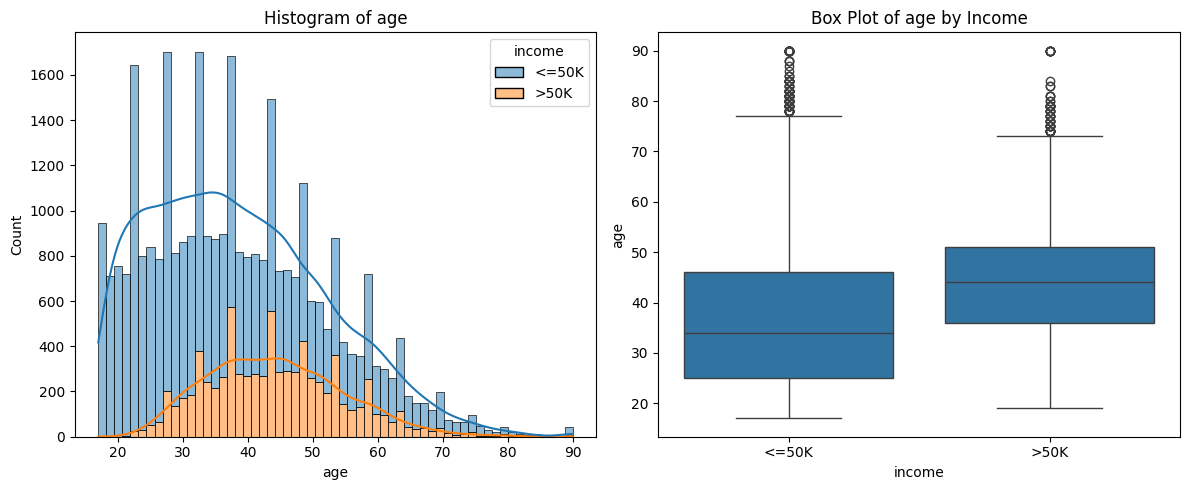

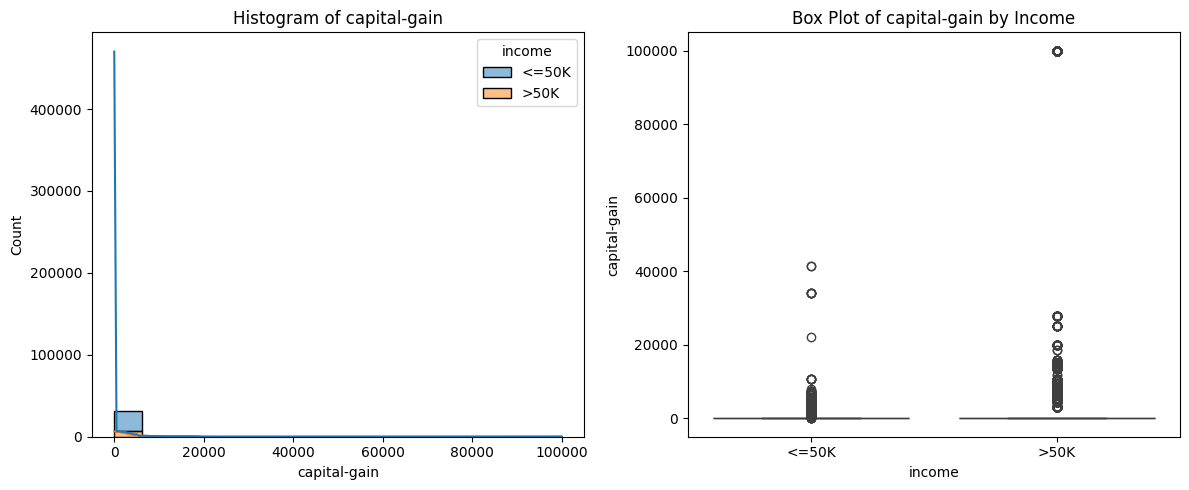

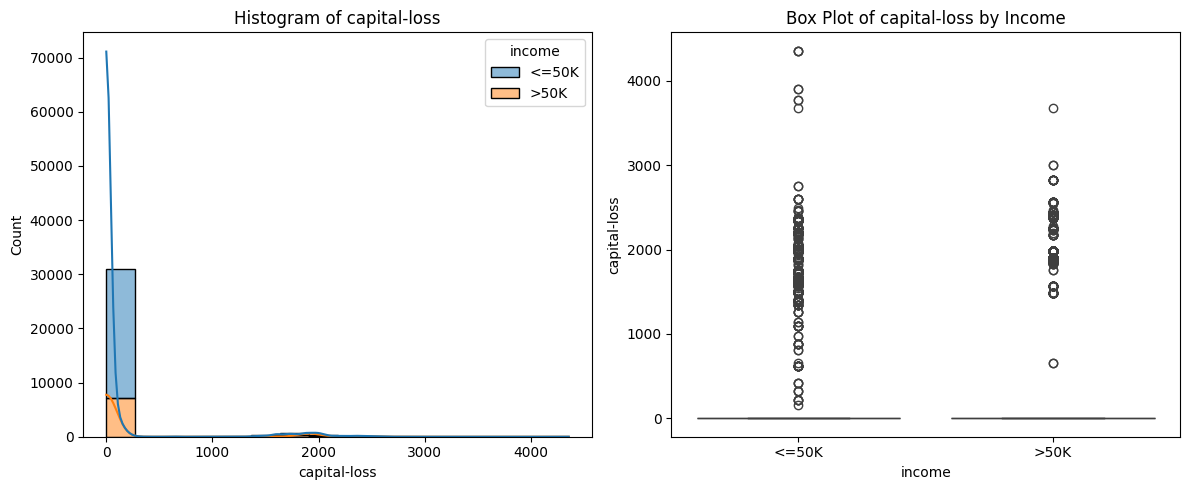

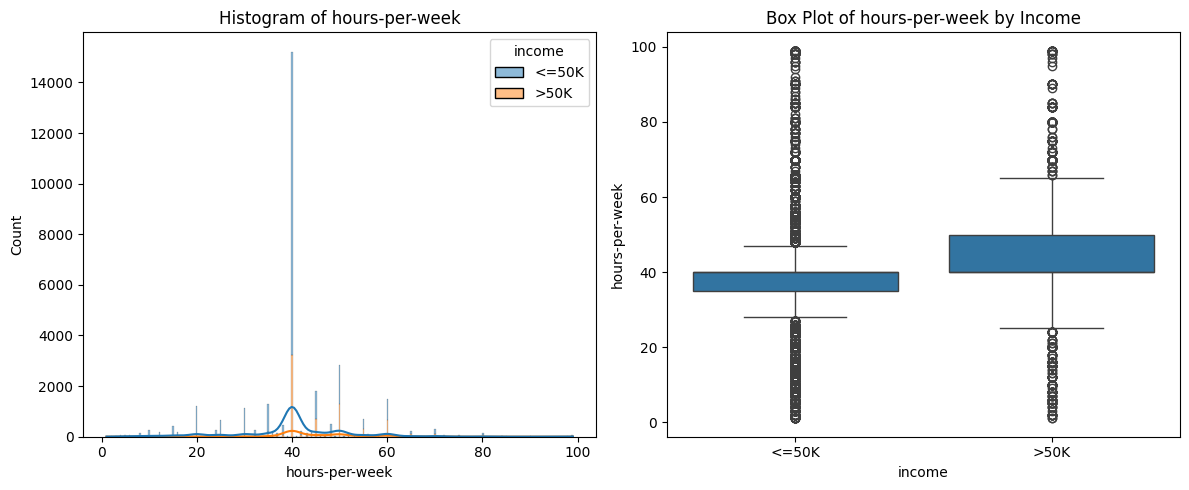

In [ ]:
# 수치형 특성 리스트
numerical_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
# 각 수치형 특성에 대한 히스토그램과 박스 플롯 시각화
for feature in numerical_features:
 plt.figure(figsize=(12, 5))
 # 히스토그램
 plt.subplot(1, 2, 1)
 sns.histplot(data=df, x=feature, hue='income', kde=True, multiple='stack')
 plt.title(f'Histogram of {feature}')
 # 박스 플롯
 plt.subplot(1, 2, 2)
 sns.boxplot(data=df, x='income', y=feature)
 plt.title(f'Box Plot of {feature} by Income')
 plt.tight_layout()
 plt.show()


###결측값 처리

In [ ]:
# 결측값이 있는 범주형 컬럼에 대해 최빈값으로 대체
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 결측값 처리 확인
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


###불필요한 정보 제거

In [ ]:
df.drop(['education', 'fnlwgt'], axis=1, inplace=True)

###범주형 데이터 인코딩

---

머신러닝 알고리즘은 수치 데이터를 입력으로 받기 때문에 문자열 형태의 범주형 데이터는 숫자로 변환해야 한다.

In [ ]:
# 목표 변수(income)를 0과 1로 변환
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Drop rows where income is NaN
df.dropna(subset=['income'], inplace=True)

# 범주형 특성을 원-핫 인코딩으로 변환
df_encoded = pd.get_dummies(df, drop_first=True)

# 변환된 데이터 확인
print(df_encoded.head())

   age  education-num  capital-gain  capital-loss  hours-per-week  income  \
0   39             13          2174             0              40       0   
1   50             13             0             0              13       0   
2   38              9             0             0              40       0   
3   53              7             0             0              40       0   
4   28             13             0             0              40       0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  ...  native-country_Portugal  \
0                   False  ...                    False   
1   

###스케일링

---

데이터마다 다른 단위와 범위를 가진다. 스케일이 큰 특성이 모델학습 과정을 지배하여 다른 특성들의 영향력이 축소되는 것을 방지하기 위해 스케일링이 필요하다. 일반적으로 표준화를 통해 평균을 0, 표준편차를 1로 변환한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
# 특성과 타겟 분리
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
# 스케일러 객체 생성
scaler = StandardScaler()
# 데이터에 스케일러 적용 (fit_transform)
X_scaled = scaler.fit_transform(X)
# 스케일링된 데이터를 다시 데이터프레임으로 변환 (컬럼명 유지를 위해)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.describe())

                age  education-num  capital-gain  capital-loss  \
count  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04   
mean  -2.705915e-17   1.471887e-16  1.309314e-17  1.016900e-16   
std    1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.582206e+00  -3.529656e+00 -1.459205e-01 -2.166595e-01   
25%   -7.757679e-01  -4.200596e-01 -1.459205e-01 -2.166595e-01   
50%   -1.159546e-01  -3.136003e-02 -1.459205e-01 -2.166595e-01   
75%    6.904838e-01   7.460392e-01 -1.459205e-01 -2.166595e-01   
max    3.769612e+00   2.300838e+00  1.339458e+01  1.059351e+01   

       hours-per-week  workclass_Local-gov  workclass_Never-worked  \
count    3.256100e+04         3.256100e+04            3.256100e+04   
mean    -1.549355e-17        -5.673693e-18           -2.836846e-18   
std      1.000015e+00         1.000015e+00            1.000015e+00   
min     -3.194030e+00        -2.620974e-01           -1.466381e-02   
25%     -3.542945e-02        -2.620974e-01           -1

##머신러닝 모델 개발

###일반화 원칙과 데이터 분할


---

머신러닝의 목표는 새로운 데이터에 대해서도 예측을 수행하는 모델을 만드는 것이다. 그런데 모델이 학습 데이터에만 지나치게 최적화되면 예측 성능이 오히려 떨어지는 과적합 현상이 발생한다. 이를 위해서 학습데이터와 테스트 데이터 분리가 필요하다. 이를통해 매몰되었는지를 알 수 있다.


---

  데이터 분리 함수 train_test_split


*   stratify=y: 학습데이터와 테스트 데이터의 비율 동일하게 유지. 클래스 불균형이 있는 데이터셋이서 중요
*   randon_state: 특정값으로 고정하면 코드를 여러번 실행하더라도 항상 동일하게 분할. 실험의 재현성을 보장하기 위해 필요



In [ ]:
from sklearn.model_selection import train_test_split
# 학습 데이터와 테스트 데이터로 분할 (7:3 비율, 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

학습 데이터 크기: (22792, 81)
테스트 데이터 크기: (9769, 81)


###로지스틱 회귀: 선형 기준 모델

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 객체 생성 및 학습
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_lr = log_reg.predict(X_test)

###결정트리: 해석 가능한 비선형 모델

---

장점: 전처리가 거의 필요 없음
단점: 과접합될 수 있음

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 객체 생성 및 학습
# max_depth를 설정하여 과적합을 방지할 수 있음 (여기서는 기본값 사용)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_dt = dt_clf.predict(X_test)


###랜덤 포레스트: 앙상블 접근법

---

앙상블은 여러 개의 약한 학습기(weak learner)를 결합하여 하나의 강력한 학습기(strong learner)를 만드는 방법론

과적합 위험을 줄여줘서 단일 결정 트리보다 안정적이고 높은 정확도를 보임

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 객체 생성 및 학습
# n_estimators는 생성할 트리의 개수를 의미
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_rf = rf_clf.predict(X_test)


##종합적인 모델 평가

---

혼동행렬

- **True Positive (TP)**: 실제 값이 Positive(고소득, 1)이고, 모델도 Positive로 올바르게 예측한 경우.
- **True Negative (TN)**: 실제 값이 Negative(저소득, 0)이고, 모델도 Negative로 올바르게 예측한 경우.
- **False Positive (FP)**: 실제 값은 Negative인데, 모델이 Positive로 잘못 예측한 경우 (Type I Error).
- **False Negative (FN)**: 실제 값은 Positive인데, 모델이 Negative로 잘못 예측한 경우 (Type II Error).

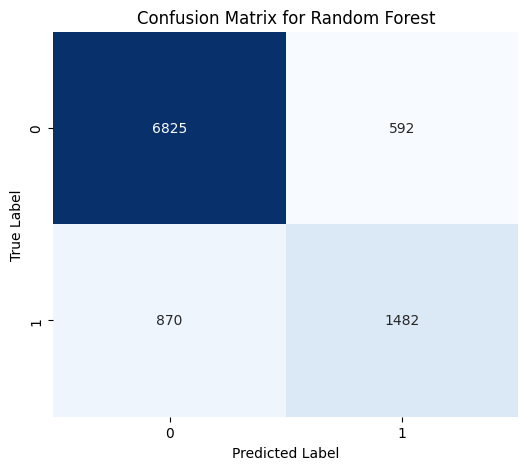

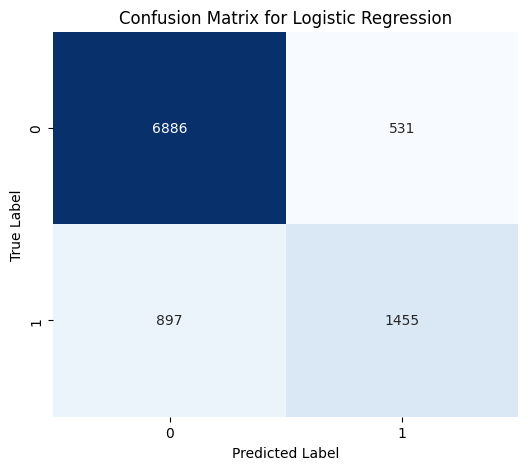

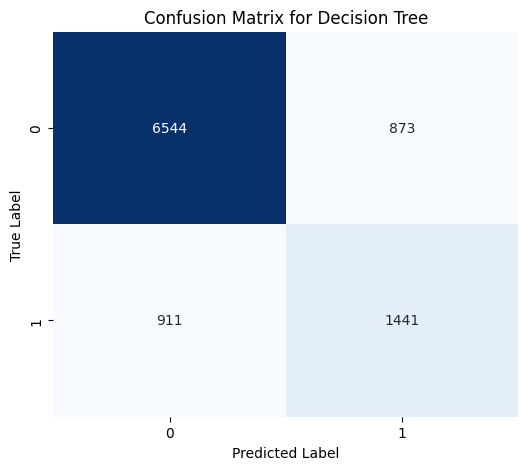

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# 각 모델에 대한 혼동 행렬 계산
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)


# 혼동 행렬 시각화 (예시: 랜덤 포레스트)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# 로지스틱 회귀 분류 리포트
print("--- Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred_lr))

# 결정 트리 분류 리포트
print("\n--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_dt))

# 랜덤 포레스트 분류 리포트
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))


--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7417
           1       0.73      0.62      0.67      2352

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769


--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7417
           1       0.62      0.61      0.62      2352

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7417
           1       0.71      0.63      0.67      2352

    accuracy                           0.8

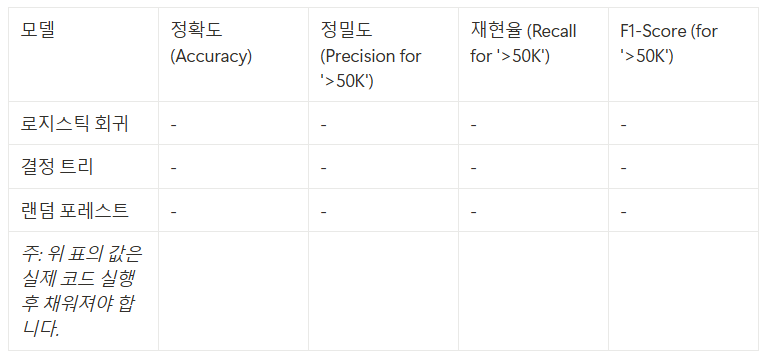

###ROC와 AUC를 이용한 비교 분석

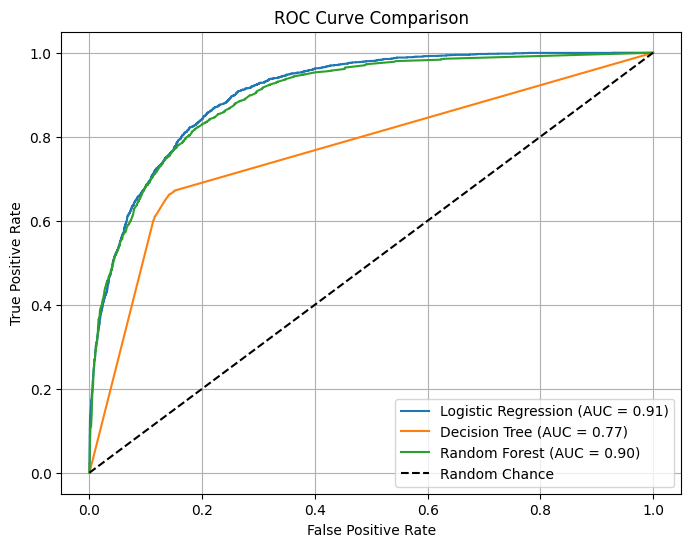

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 각 모델의 예측 확률 계산 (Positive 클래스에 대한 확률)
prob_lr = log_reg.predict_proba(X_test)[:, 1]
prob_dt = dt_clf.predict_proba(X_test)[:, 1]
prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# ROC 곡선 계산
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, prob_rf)

# AUC 계산
auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Random Chance (대각선)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


####촤측 상단에 가까워질수록 성능이 좋아짐

###특성 중요도와 모델 인사이트

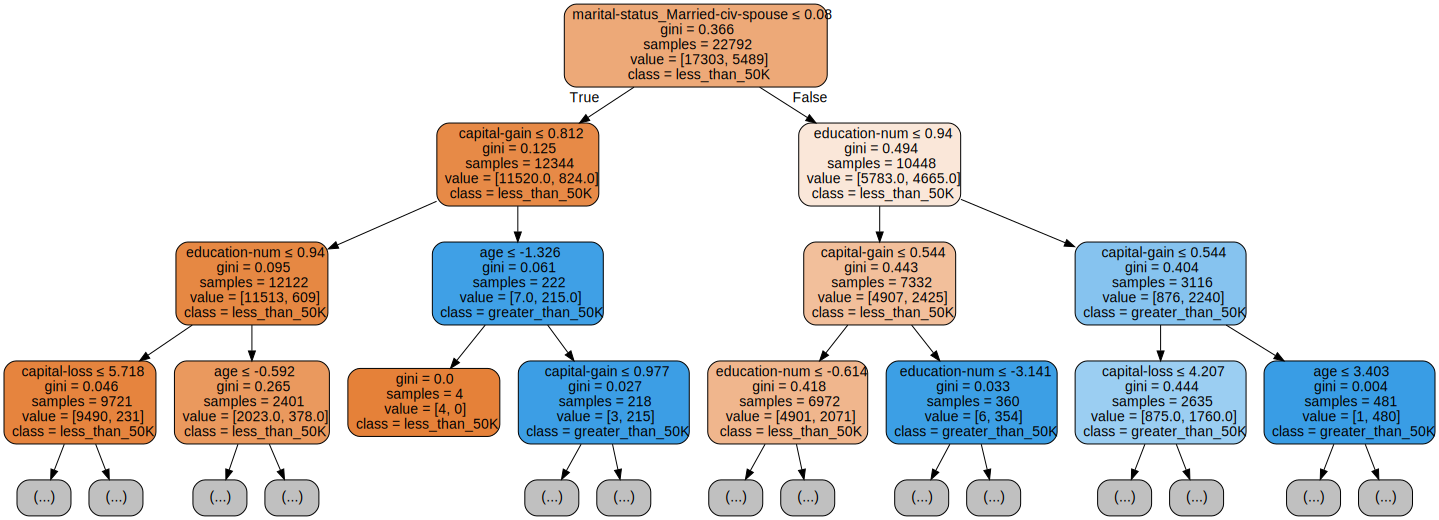

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# 결정 트리 시각화를 위한 DOT 데이터 생성 (트리 깊이를 3으로 제한하여 가독성 확보)
# class_names에 특수 문자가 포함되어 있어 오류가 발생할 수 있으므로, 유효한 문자열로 대체합니다.
dot_data = export_graphviz(dt_clf,
                           max_depth=3,
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=['less_than_50K', 'greater_than_50K'], # 특수 문자 제거
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Graphviz를 사용하여 시각화
graph = graphviz.Source(dot_data)
graph.render("adult_decision_tree") # PDF 파일로 저장
graph

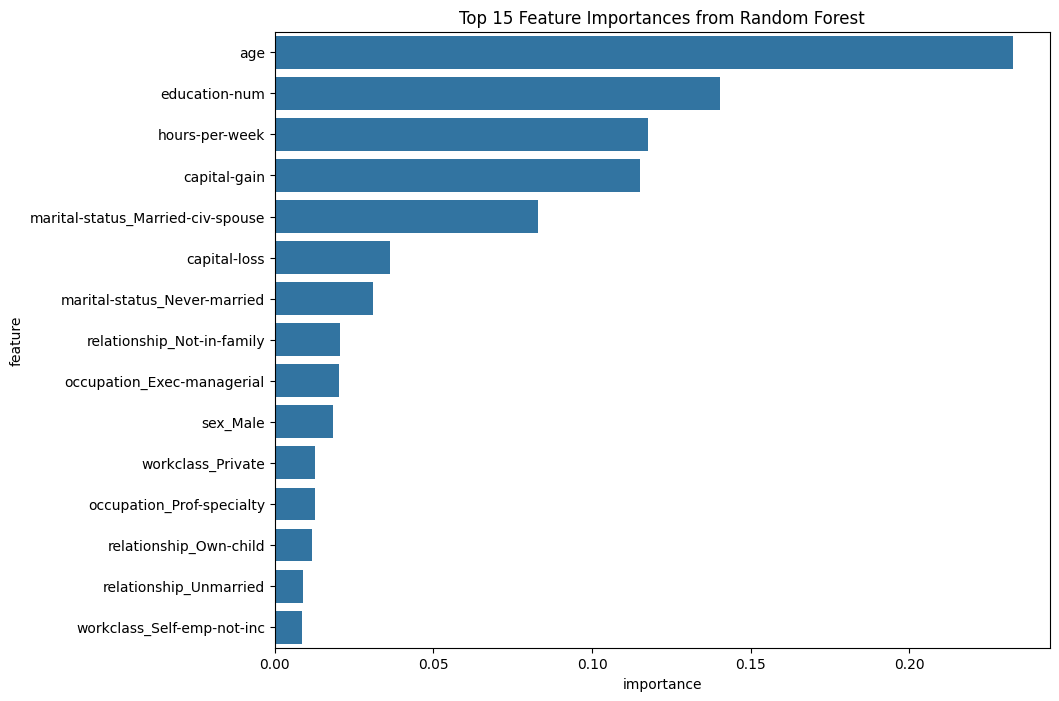

                                      feature    importance
0                                         age  2.325642e-01
1                               education-num  1.402594e-01
4                              hours-per-week  1.176701e-01
2                                capital-gain  1.151267e-01
13          marital-status_Married-civ-spouse  8.302745e-02
..                                        ...           ...
6                      workclass_Never-worked  1.997137e-05
55                    native-country_Honduras  1.501666e-05
67  native-country_Outlying-US(Guam-USVI-etc)  1.407281e-05
18                    occupation_Armed-Forces  7.126546e-06
54          native-country_Holand-Netherlands  1.992410e-07

[81 rows x 2 columns]


In [ ]:
# 랜덤 포레스트 모델로부터 특성 중요도 추출
importances = rf_clf.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15)) # 상위 15개만 표시
plt.title('Top 15 Feature Importances from Random Forest')
plt.show()

# 특성 중요도 표
print(feature_importance_df)

####평균적으로 얼마나 불순도를 감소시켰는지를 나타냅니다. 이 값이 클수록 해당 특성이 예측에 더 큰 영향을 미쳤다고 해석할 수 있습니다.

##결론

---

랜덤 포레스트가 종합적으로 가장 우수함

결정트리는 모델 해석 측면에서 강점을 가짐

예측도가 중요 - 랜덤포레스트 채택